# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [1]:
id1 = "205560782"
id2 = "315810176"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.DataFrame([id1,id2])

Uncomment in case two students are doing the assignment together:

In [4]:
#df = pd.DataFrame([id1,id2])

In [5]:
df.to_clipboard(index=False,header=False)

---

----

In [6]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Q1 
we grouped the table by region and year and than sum the column total_sold by year

In [8]:
data.groupby(['region','year'])[['total_sold']].sum()


total_sold
region           year             
Albany           2015   4029896.43
                 2016   5264335.59
                 2017   5231581.78
                 2018   1541986.17
Atlanta          2015  23231698.12
...                            ...
West             2018  92477085.01
WestTexNewMexico 2015  41523998.11
                 2016  43807431.60
                 2017  47389589.29
                 2018  11800820.78

[216 rows x 1 columns]

# Q2
first we show the area by the first letter in Inbar's name
we made new variebel that contane the columns region by the varieble name and by 2016 in the columns year, than we show the row's number of our new data

In [9]:
name=data[data['region'].str.contains('I')]
name.region
df= data.loc[(data.region=='Indianapolis')&(data.year==2016)].reset_index()
df_len=df.index
len(df_len)

104

# Q3
by data frame of total_sold we present the mean of total sold

In [10]:
 df['total_sold'].mean()

88119.74519230773

# Q4
first we made new column that contane the number of the month
second used the method loc and We set up to represent only the rows that contained September and then we did a dataframe on total bags and summed up the result

In [11]:
df['bag_month']=pd.DatetimeIndex(df.Date).month
mon_df=df.loc[(df.bag_month)==9]
mon_df['Total Bags'].sum()

202393.54

# Q5
we made catplot that present the number of the kind sells of Avocado
the catplot sepered the type columns to his index organic and conventional

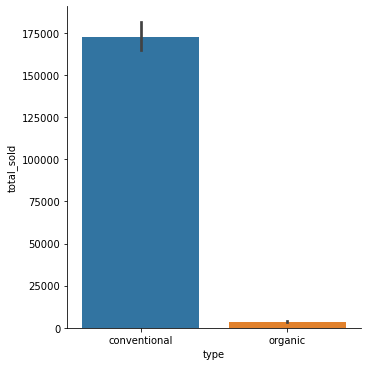

In [12]:
sns.catplot(x="type", y="total_sold", kind="bar", data=df)
plt.show()

# Q6
first we made the columns type category 
than we made matrix correlation by the varieble features round the result to two number after the dot and present heatmap of the correlation

<AxesSubplot:>

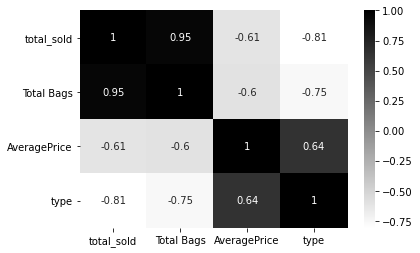

In [13]:
cat_type= data.copy()
cat_type['type']= data['type'].astype('category').cat.codes

features = ['total_sold', 'Total Bags', 'AveragePrice', 'type']

matrix_corr= cat_type[features].corr(method='spearman')
matrix_corr
matrix_corr.corr().round(2)
sns.heatmap(data=matrix_corr,cmap='binary', annot=True)

# Q7
we did scatterplot by the two columns that told to by year

<AxesSubplot:xlabel='Total Bags', ylabel='total_sold'>

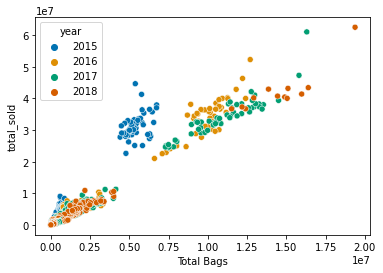

In [14]:
sns.scatterplot(data=data, x="Total Bags", y="total_sold", hue = 'year', palette = 'colorblind')

# Q8

In [15]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
total_sold      0
small_sold      0
large_sold      0
sma             0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Q9

<AxesSubplot:xlabel='total_sold', ylabel='Count'>

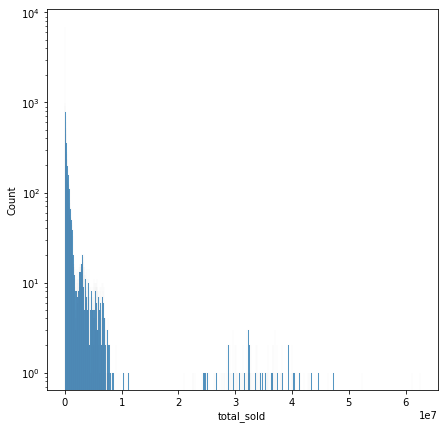

In [16]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.histplot(data=data, x='total_sold',log_scale=False)

# Q10
צרו טבלה שמראה את המחיר הממוצע )העמודה averagePrice ( לכל סוג אבוקדו )העמודה
type ( על פני כל השנים )העמודה year .)

In [17]:
data_new=data[['type','year','AveragePrice']]

data_new.groupby(['type','year'])[['AveragePrice']].mean()

AveragePrice
type         year              
conventional 2015      1.077963
             2016      1.105595
             2017      1.294888
             2018      1.127886
organic      2015      1.673324
             2016      1.571684
             2017      1.735521
             2018      1.567176

# Q11

In [49]:
model_1 = DecisionTreeRegressor(random_state=4,max_depth=55)
features = ['region','type','AveragePrice','Total Bags']
x = pd.get_dummies(data[features])
y = data['total_sold']
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=42) 
model_1.fit(x_train, y_train)
pred = model_1.predict(x_test)
def mse(a,b):
    return ('mse:{:.3f}'.format(np.sqrt(np.square(a-b).mean())))
mse(y_test.values,pred)


'mse:492328.351'

---
# GOOD LUCK !!!!
---

In [ ]:
# do not type below this line